In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Read destinations.csv, sources.csv, and ancillary.csv
destinations_df = pd.read_csv('Destinations.csv')
sources_df = pd.read_csv('Sources.csv')
ancillary_df = pd.read_csv('Ancillary.csv')

# Merge all DataFrames into one DataFrame containing all the locations
locations_df = pd.concat([destinations_df, sources_df,ancillary_df], ignore_index=True)

# Save the merged DataFrame as "locations.csv"
locations_df.to_csv('Locations.csv', index=False)

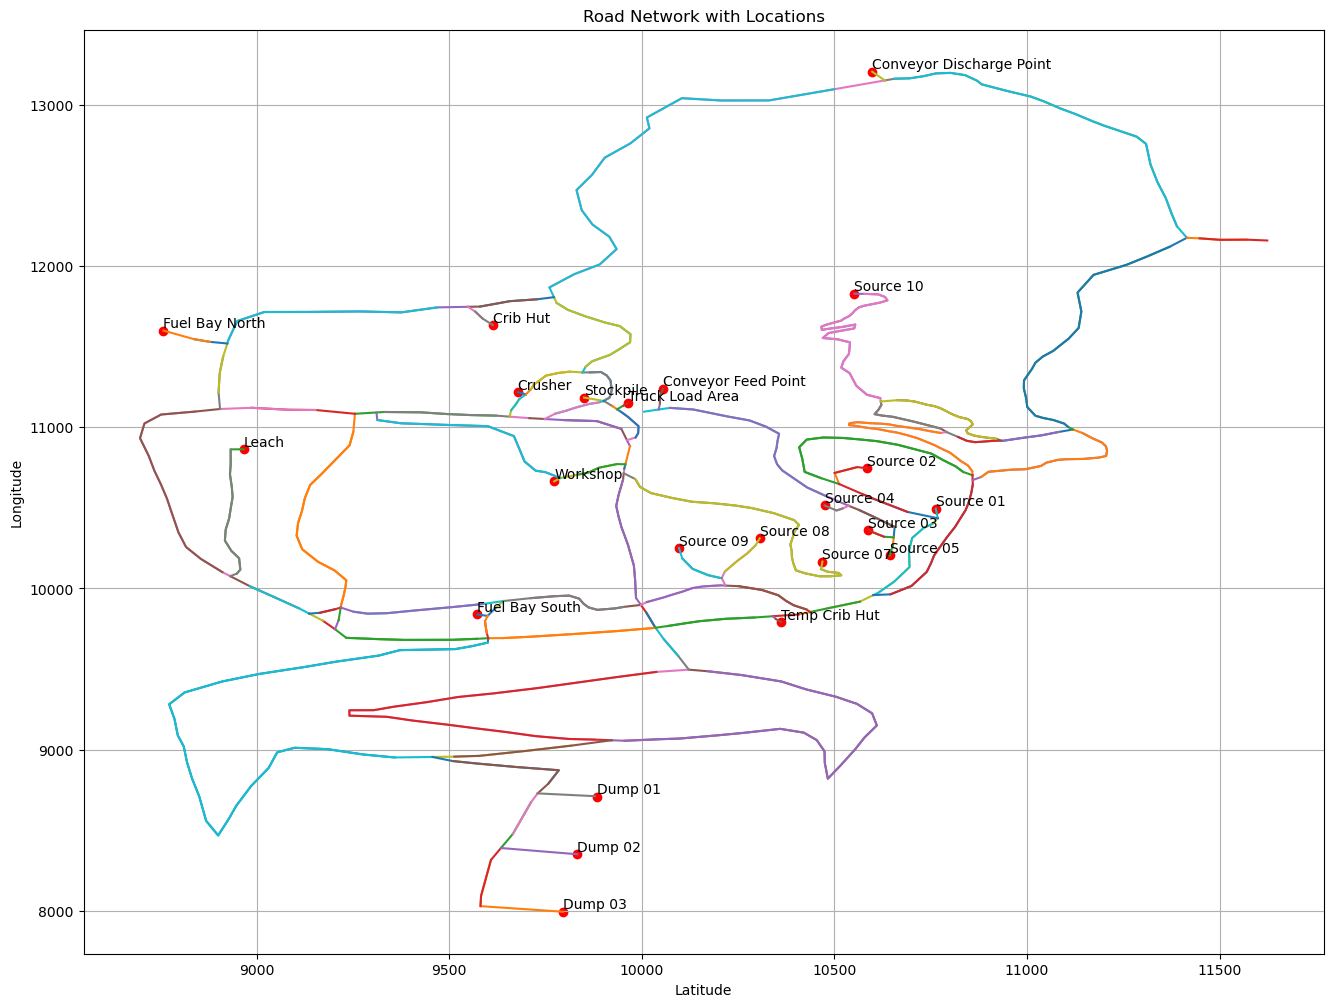

In [5]:
class Location:
    def __init__(self, name, coordinates):
        self.name = name
        self.coordinates = coordinates

class LineNode:
    def __init__(self, id, lineset, neighbors):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self):
        self.nodes = {}

    def insert_linenode(self, linenode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id):
        return self.nodes[id]

def read_linesets():
    # Read road points from an Excel file
    road_points_df = pd.read_csv('Roads.csv', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')

    linesets = {}
    nodes = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        lines = [[i, i+1] for i in range(len(points)-1)]

        linesets[group_id] = points

        nodes[group_id] = LineNode(group_id, linesets[group_id], set())

    for id, linenode in nodes.items():
        lineset = linenode.lineset

        for other_id, other_linenode in nodes.items():
            if other_id == id or other_id in linenode.neighbors:
                continue

            points_one = linenode.lineset
            points_two = other_linenode.lineset

            if np.array_equal(points_one, points_two):
                linenode.neighbors.add(other_id)
                other_linenode.neighbors.add(id)

    graph = LineGraph()
    graph.nodes = nodes

    return graph


def read_locations():
    # Read location points from a CSV file
    location_df = pd.read_csv('Locations.csv')
    
    locations = []
    for _, row in location_df.iterrows():
        name = row['Name']
        coordinates = [row['X'], row['Y']]
        locations.append(Location(name, coordinates))
    
    return locations


linesets = read_linesets()
locations = read_locations()

plt.figure(figsize=(16, 12))

for node_id, linenode in linesets.nodes.items():
    points = linenode.lineset
    plt.plot(points[:, 0], points[:, 1], label=f"Line {node_id}")

# Display the locations on the road network graph and label them with their names
for location in locations:
    plt.scatter(location.coordinates[0], location.coordinates[1], color='red')
    plt.text(location.coordinates[0], location.coordinates[1], location.name, fontsize=10, ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Road Network with Locations')
plt.grid()
plt.show()


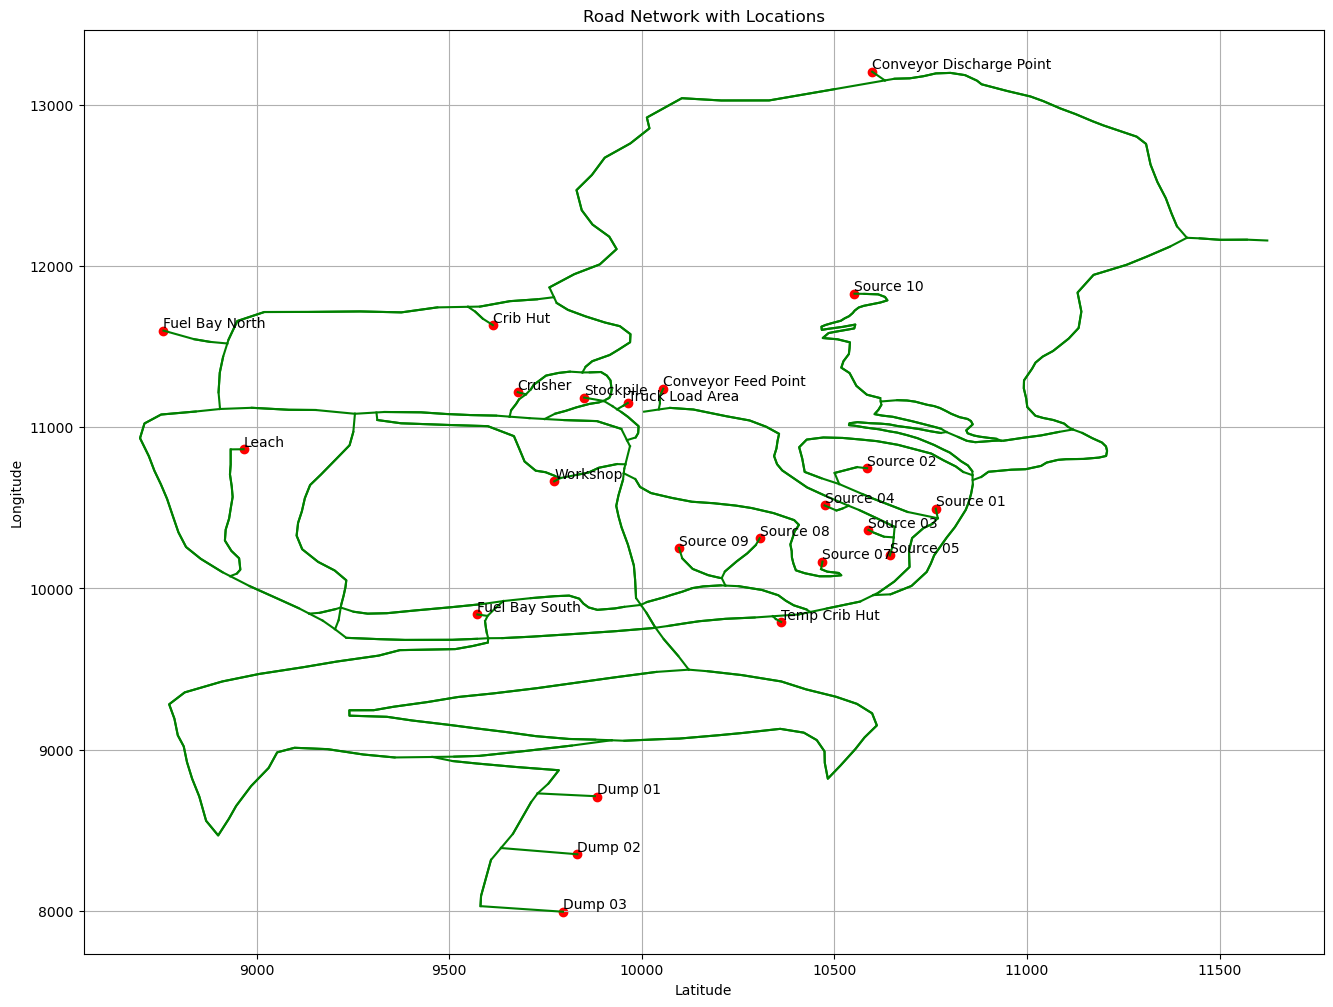

In [7]:
class Location:
    def __init__(self, name, coordinates):
        self.name = name
        self.coordinates = coordinates

class LineNode:
    def __init__(self, id, lineset, neighbors):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self):
        self.nodes = {}

    def insert_linenode(self, linenode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id):
        return self.nodes[id]

def read_linesets():
    # Read road points from an Excel file
    road_points_df = pd.read_csv('Roads.csv', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')

    linesets = {}
    nodes = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        lines = [[i, i+1] for i in range(len(points)-1)]

        linesets[group_id] = points

        nodes[group_id] = LineNode(group_id, linesets[group_id], set())

    for id, linenode in nodes.items():
        lineset = linenode.lineset

        for other_id, other_linenode in nodes.items():
            if other_id == id or other_id in linenode.neighbors:
                continue

            points_one = linenode.lineset
            points_two = other_linenode.lineset

            if np.array_equal(points_one, points_two):
                linenode.neighbors.add(other_id)
                other_linenode.neighbors.add(id)

    graph = LineGraph()
    graph.nodes = nodes

    return graph


def read_locations():
    # Read location points from a CSV file
    location_df = pd.read_csv('Locations.csv')
    
    locations = []
    for _, row in location_df.iterrows():
        name = row['Name']
        coordinates = [row['X'], row['Y']]
        locations.append(Location(name, coordinates))
    
    return locations


linesets = read_linesets()
locations = read_locations()

plt.figure(figsize=(16, 12))

# Set a color for all lines
line_color = 'green'

for node_id, linenode in linesets.nodes.items():
    points = linenode.lineset
    plt.plot(points[:, 0], points[:, 1], color=line_color)

# Display the locations on the road network graph and label them with their names
for location in locations:
    plt.scatter(location.coordinates[0], location.coordinates[1], color='red')
    plt.text(location.coordinates[0], location.coordinates[1], location.name, fontsize=10, ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Road Network with Locations')
plt.grid()
plt.show()


**Rewriting the code to read the excel file exported from the GUI**

In [8]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df_excel = pd.read_excel('/Users/mgoli1/Documents/P/Project/AutonoDES/Software/Data/11 Dec/road_points (exported).xlsx')
print(df_excel.head())

   StringId            X            Y            Z
0         1  9601.287117  9691.650345  1094.534287
1         1  9600.374137  9664.688033  1094.247445
2         1  9561.233671  9643.323929  1092.217561
3         1  9515.742000  9624.118000  1090.409000
4         1  9371.913000  9617.692000  1090.397000


In [11]:
csv_file_path = 'Roads.Ex.csv'
df_excel.to_csv(csv_file_path, index=False)

In [12]:
df_csv = pd.read_csv(csv_file_path)

In [13]:
print(df_csv.head())

   StringId            X            Y            Z
0         1  9601.287117  9691.650345  1094.534287
1         1  9600.374137  9664.688033  1094.247445
2         1  9561.233671  9643.323929  1092.217561
3         1  9515.742000  9624.118000  1090.409000
4         1  9371.913000  9617.692000  1090.397000


**Using the exported roads map file**

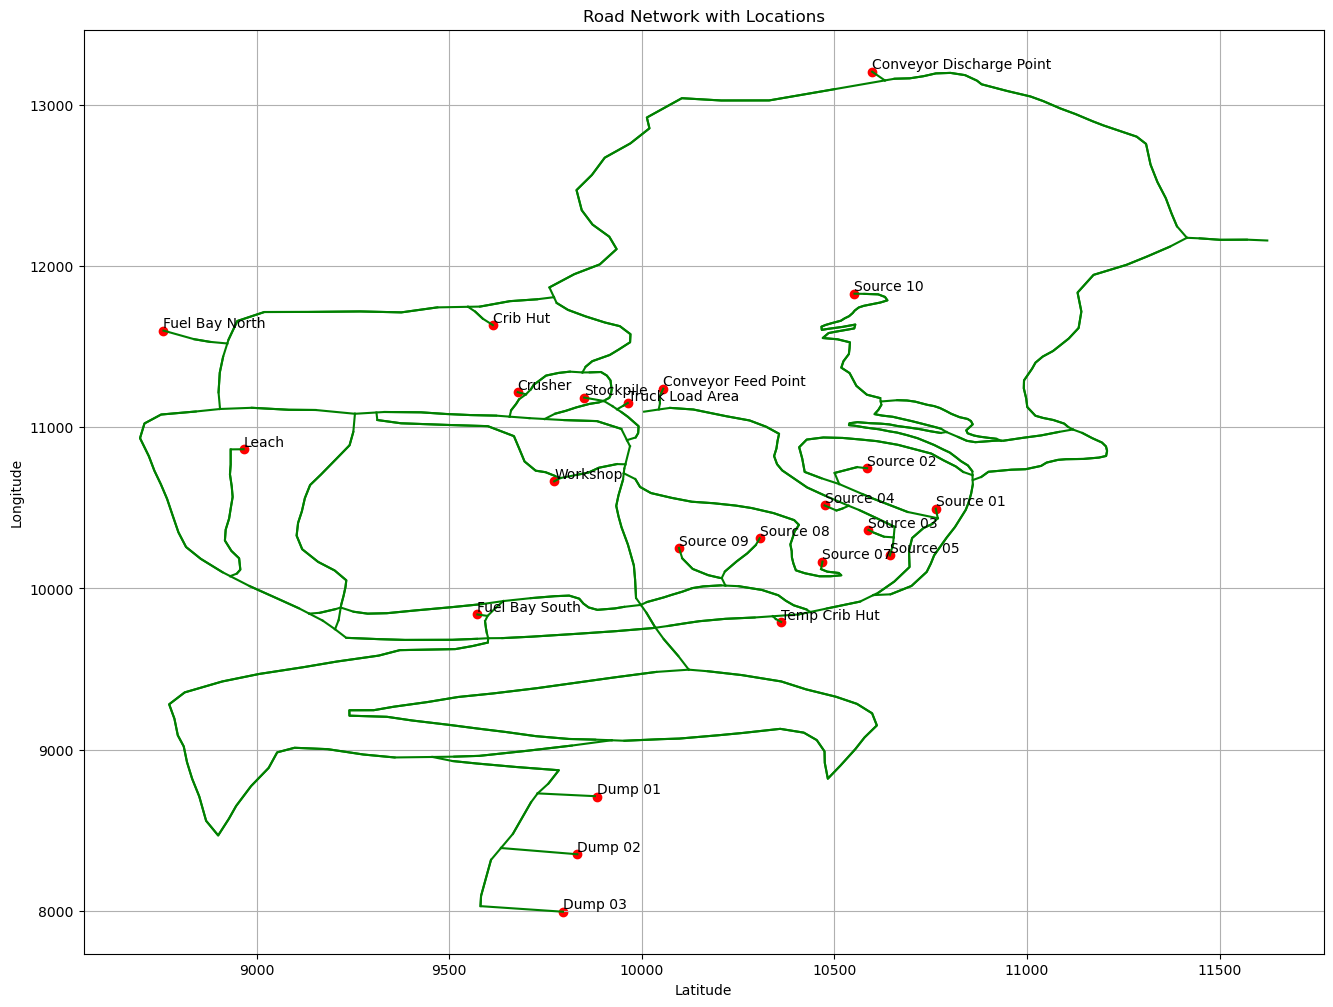

In [14]:
class Location:
    def __init__(self, name, coordinates):
        self.name = name
        self.coordinates = coordinates

class LineNode:
    def __init__(self, id, lineset, neighbors):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self):
        self.nodes = {}

    def insert_linenode(self, linenode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id):
        return self.nodes[id]

def read_linesets():
    # Read road points from an Excel file
    road_points_df = pd.read_csv('Roads.Ex.csv', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')

    linesets = {}
    nodes = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        lines = [[i, i+1] for i in range(len(points)-1)]

        linesets[group_id] = points

        nodes[group_id] = LineNode(group_id, linesets[group_id], set())

    for id, linenode in nodes.items():
        lineset = linenode.lineset

        for other_id, other_linenode in nodes.items():
            if other_id == id or other_id in linenode.neighbors:
                continue

            points_one = linenode.lineset
            points_two = other_linenode.lineset

            if np.array_equal(points_one, points_two):
                linenode.neighbors.add(other_id)
                other_linenode.neighbors.add(id)

    graph = LineGraph()
    graph.nodes = nodes

    return graph


def read_locations():
    # Read location points from a CSV file
    location_df = pd.read_csv('Locations.csv')
    
    locations = []
    for _, row in location_df.iterrows():
        name = row['Name']
        coordinates = [row['X'], row['Y']]
        locations.append(Location(name, coordinates))
    
    return locations


linesets = read_linesets()
locations = read_locations()

plt.figure(figsize=(16, 12))

# Set a color for all lines
line_color = 'green'

for node_id, linenode in linesets.nodes.items():
    points = linenode.lineset
    plt.plot(points[:, 0], points[:, 1], color=line_color)

# Display the locations on the road network graph and label them with their names
for location in locations:
    plt.scatter(location.coordinates[0], location.coordinates[1], color='red')
    plt.text(location.coordinates[0], location.coordinates[1], location.name, fontsize=10, ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Road Network with Locations')
plt.grid()
plt.show()


**Previous code with eliminating the Line variable**

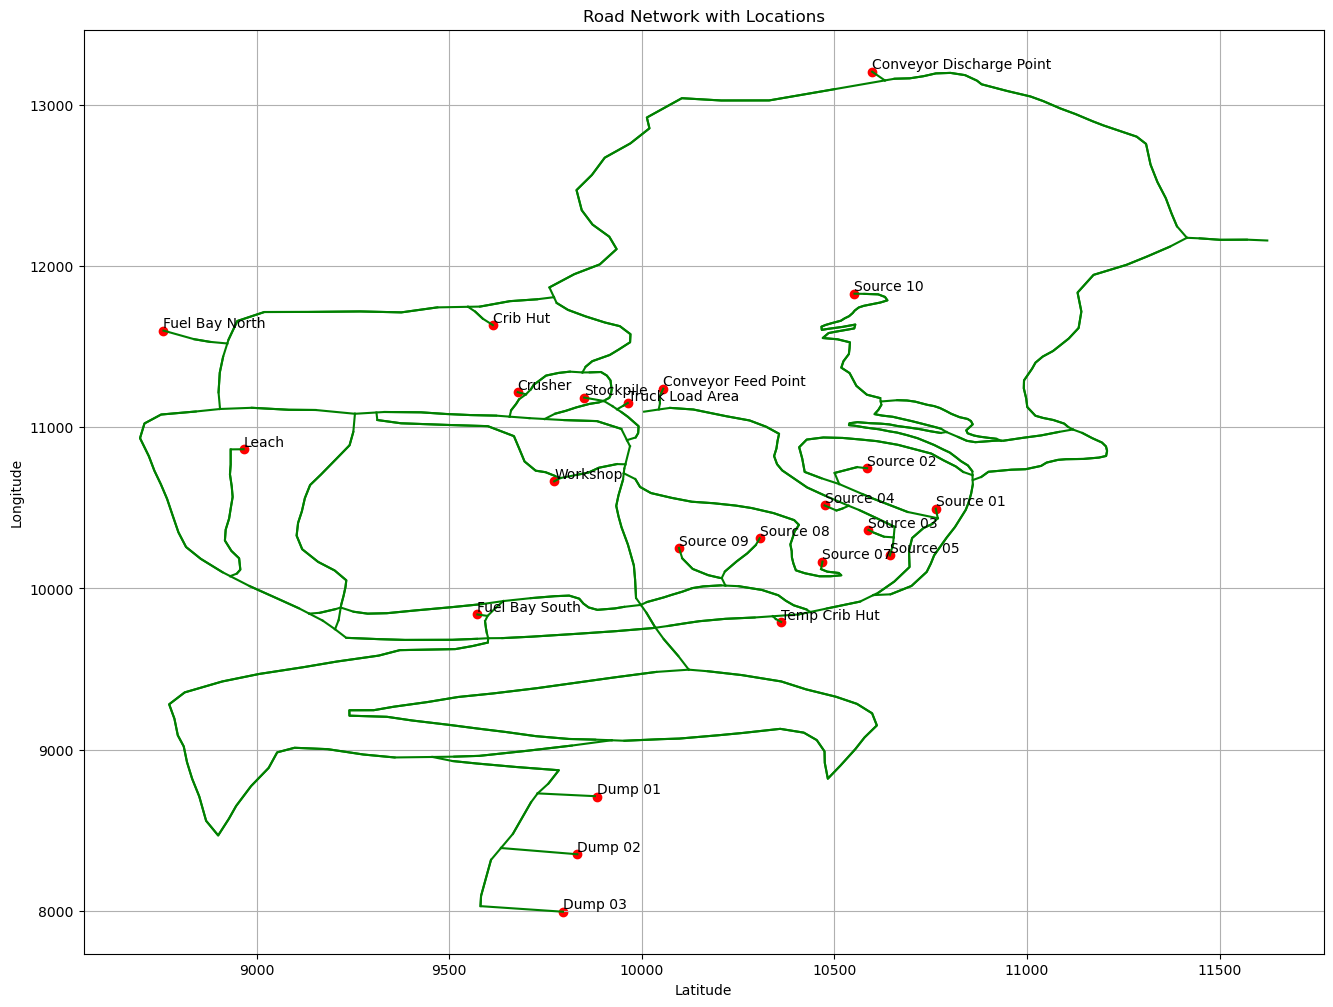

In [15]:
class Location:
    def __init__(self, name, coordinates):
        self.name = name
        self.coordinates = coordinates

class LineNode:
    def __init__(self, id, lineset, neighbors):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self):
        self.nodes = {}

    def insert_linenode(self, linenode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id):
        return self.nodes[id]

def read_linesets():
    # Read road points from an Excel file
    road_points_df = pd.read_csv('Roads.Ex.csv', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')

    linesets = {}
    nodes = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        linesets[group_id] = points
        nodes[group_id] = LineNode(group_id, linesets[group_id], set())

    for id, linenode in nodes.items():
        lineset = linenode.lineset

        for other_id, other_linenode in nodes.items():
            if other_id == id or other_id in linenode.neighbors:
                continue

            points_one = linenode.lineset
            points_two = other_linenode.lineset

            if np.array_equal(points_one, points_two):
                linenode.neighbors.add(other_id)
                other_linenode.neighbors.add(id)

    graph = LineGraph()
    graph.nodes = nodes

    return graph


def read_locations():
    # Read location points from a CSV file
    location_df = pd.read_csv('Locations.csv')
    
    locations = []
    for _, row in location_df.iterrows():
        name = row['Name']
        coordinates = [row['X'], row['Y']]
        locations.append(Location(name, coordinates))
    
    return locations


linesets = read_linesets()
locations = read_locations()

plt.figure(figsize=(16, 12))


for node_id, linenode in linesets.nodes.items():
    points = linenode.lineset
    plt.plot(points[:, 0], points[:, 1], color='green')

# Display the locations on the road network graph and label them with their names
for location in locations:
    plt.scatter(location.coordinates[0], location.coordinates[1], color='red')
    plt.text(location.coordinates[0], location.coordinates[1], location.name, fontsize=10, ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Road Network with Locations')
plt.grid()
plt.show()


**2d Plot from Amin's code**

In [30]:
import open3d as o3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class LineNode:
    def __init__(self, id: int, lineset: o3d.geometry.LineSet, neighbors: set[int]):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self, linenodes):
        self.nodes = linenodes

    def insert_linenode(self, linenode: LineNode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id: int):
        return self.nodes[id]

In [32]:

def read_linesets():
    
    # Extract the road points
    road_points_df = pd.read_excel('/Users/mgoli1/Documents/P/Project/AutonoDES/Software/Data/11 Dec/road_points.xlsx', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')
    linesets = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        lines = [[i, i+1] for i in range(len(points)-1)]
        lineset = o3d.geometry.LineSet()
        lineset.points = o3d.utility.Vector3dVector(points)
        lineset.lines = o3d.utility.Vector2iVector(lines)
        lineset.paint_uniform_color([0, 0, 1])
        linesets[group_id] = lineset

    nodes = {}
    for x in range(1, len(linesets) + 1):
        nodes[x] = LineNode(x, linesets[x], set())

    for linenode in nodes.values():
        id = linenode.id
        lineset = linenode.lineset
        for other_id in range(1, len(linesets)+1):
            if other_id == id: continue
            if other_id in nodes[id].neighbors: continue

            points_one = np.asarray(lineset.points)
            points_two = np.asarray(linesets[other_id].points)
            for point_1_id in range(points_one.shape[0]):
                for point_2_id in range(points_two.shape[0]):
                    if np.all(np.equal(points_one[point_1_id, :], points_two[point_2_id, :])):
                        nodes[id].neighbors.add(other_id)
                        nodes[other_id].neighbors.add(id)

    global graph
    graph = LineGraph(nodes)


# Call the function to read linesets and plot the graph
read_linesets()


**New added part to the previous code for plot**

In [33]:
# Read destinations.csv, sources.csv, and ancillary.csv
destinations_df = pd.read_csv('Destinations.csv')
sources_df = pd.read_csv('Sources.csv')
ancillary_df = pd.read_csv('Ancillary.csv')

# Merge all DataFrames into one DataFrame containing all the locations
locations_df = pd.concat([destinations_df, sources_df,ancillary_df], ignore_index=True)

# Save the merged DataFrame as "locations.csv"
locations_df.to_csv('Locations.csv', index=False)

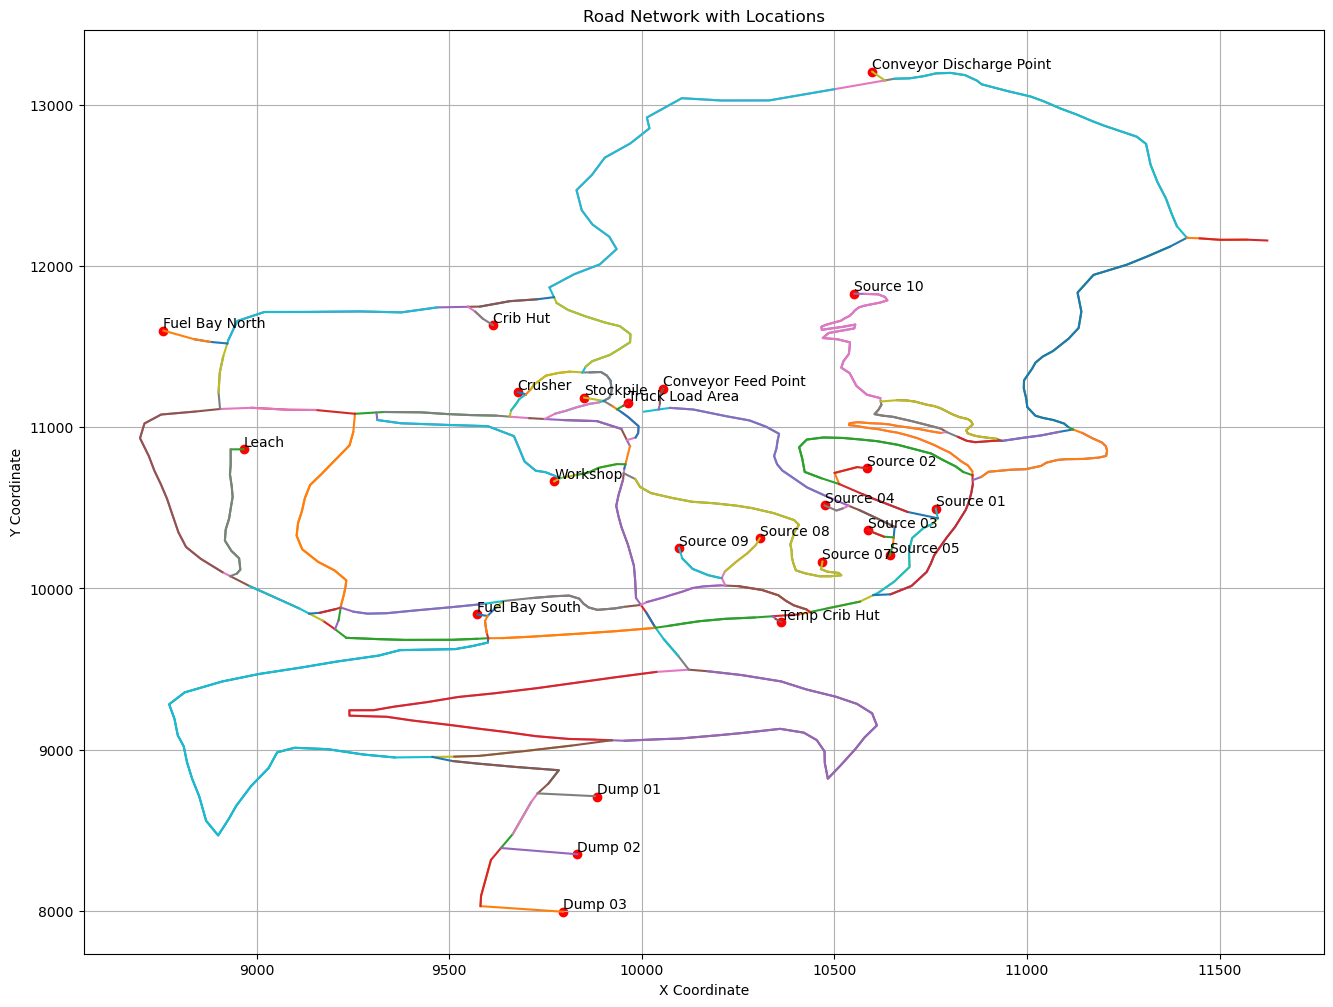

In [35]:
import matplotlib.pyplot as plt
def plot_graph_2d(graph, locations):
    plt.figure(figsize=(16, 12))
    
    # Plot each line set in 2D
    for linenode in graph.nodes.values():
        points = np.asarray(linenode.lineset.points)
        plt.plot(points[:, 0], points[:, 1], label=f'Line {linenode.id}')
    
    # Display node names if corresponding location exists
    for location in locations:
        plt.scatter(location.coordinates[0], location.coordinates[1], color='red')
        plt.text(location.coordinates[0], location.coordinates[1], location.name, fontsize=10, ha='left', va='bottom')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Road Network with Locations')
    plt.grid(True)
    plt.show()

# Call the function to read linesets and locations, and plot the graph
locations = read_locations()
plot_graph_2d(graph, locations)
